# Importing Libraries

In [104]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler


In [16]:
ls

NasaExoplanetArchive.csv  Untitled.ipynb


# Data Preprocessing

In [30]:
df = pd.read_csv('NasaExoplanetArchive.csv')
print(df.head())
print(df.shape)

   rowid     kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2      3  10811496  K00753.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0      1.000              0              0              0              0   
1      0.969              0              0              0              0   
2      0.000              0              1              0              0   
3      0.000              0              1              0              0   
4      1.000              0              0              0              0   

   koi_period  koi_period_err1  koi_period_err2  koi_time0bk  

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [69]:
#to avoid losing data permanently when dropping columns, we will make a copy
#we will drop the kepID, KOI name & kepler name do it doesn't memorize
exoplanets = df.copy()
exoplanets.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

## I. Dropping columns

### 1. Identification columns
we will drop the kepID, KOI name & kepler name do it doesn't memorize 
& because it doesnt add value in classification features

In [70]:

exoplanets.drop(columns=['rowid','kepid','kepoi_name','kepler_name'], inplace=True)
exoplanets.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

***
### 2. Feature columns that won't benefit in detecton of exoplanets
we will drop all the features we won't use (reasons stated in document)

In [71]:

exoplanets.drop(columns=['koi_disposition','koi_score','koi_fpflag_ss','koi_fpflag_co', 'koi_fpflag_ec',
                        'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2',
                        'koi_impact', 'koi_impact_err1', 'koi_impact_err2','koi_duration_err1', 
                         'koi_duration_err2',  'koi_depth_err1', 'koi_depth_err2','koi_prad_err1',
                         'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2',  'koi_insol_err1',
                         'koi_insol_err2', 'koi_tce_plnt_num','koi_tce_delivname', 'koi_steff', 
                         'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2',
                         'koi_srad_err1', 'koi_srad_err2','ra', 'dec', 'koi_kepmag' ], inplace=True)
exoplanets.columns

Index(['koi_pdisposition', 'koi_fpflag_nt', 'koi_period', 'koi_time0bk',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_insol', 'koi_model_snr',
       'koi_slogg', 'koi_srad'],
      dtype='object')

***
## II. Feature Engineering

***
### 1. Label Encoding
  we want to predict koi_pdisposition, which is either "CANDIDATE" (i.e exoplanet found)
 "FALSE POSITIVE" (i.e no exoplanet found)
-  since they are strings, we will do direct mapping where false positive is 0 and candidate is 1

In [47]:
class_names = exoplanets['koi_pdisposition'].unique()
class_names

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [72]:

direct_mapping = {'FALSE POSITIVE': 0, 'CANDIDATE': 1}
exoplanets['koi_pdisposition'] = df['koi_pdisposition'].map(direct_mapping)

In [73]:
class_names = exoplanets['koi_pdisposition'].unique()
class_names

array([1, 0])

***
### 2. Replacing Unknown Values

checking which columns have null values

In [77]:
exoplanets.isna().any()

koi_pdisposition    False
koi_fpflag_nt       False
koi_period          False
koi_time0bk         False
koi_duration        False
koi_depth            True
koi_prad             True
koi_insol            True
koi_model_snr        True
koi_slogg            True
koi_srad             True
dtype: bool

***
- checking which technique for NA filling based on number of NAs
- if number is small --> drop, if not --> interpolation using some auxiliary feature OR mean of corresponding distribution

In [88]:
exoplanets.isna().sum()

koi_pdisposition      0
koi_fpflag_nt         0
koi_period            0
koi_time0bk           0
koi_duration          0
koi_depth           363
koi_prad            363
koi_insol           321
koi_model_snr       363
koi_slogg           363
koi_srad            363
dtype: int64

***
- trying to find a correlation between NAs


In [87]:
null = exoplanets[(exoplanets["koi_depth"].isna()) & ~(exoplanets["koi_insol"].isna())]
null

,koi_pdisposition,koi_fpflag_nt,koi_period,koi_time0bk,koi_duration,koi_depth,koi_prad,koi_insol,koi_model_snr,koi_slogg,koi_srad
492,0,1,1.634846,134.512115,6.11,NaN,NaN,17098.40,NaN,NaN,NaN
2723,0,1,21.341970,134.094000,10.73,NaN,NaN,105.86,NaN,NaN,NaN
3590,0,1,87.140633,169.262000,18.11,NaN,NaN,11.37,NaN,NaN,NaN
3880,0,1,14.589393,136.140700,15.54,NaN,NaN,102.46,NaN,NaN,NaN
4887,0,0,3.471400,133.750744,1.55,NaN,NaN,493.28,NaN,NaN,NaN
5255,0,0,1.103978,131.573418,0.74,NaN,NaN,105.80,NaN,NaN,NaN
5366,0,0,2.389201,132.059910,3.15,NaN,NaN,752.42,NaN,NaN,NaN
5965,0,1,1.395089,132.059107,2.09,NaN,NaN,105390.13,NaN,NaN,NaN
6082,0,1,25.221893,143.631600,14.84,NaN,NaN,101.29,NaN,NaN,NaN
6188,0,1,94.818136,186.326200,83.31,NaN,NaN,112.85,NaN,NaN,NaN


***
since no clear correlation is there, we will take the mean of corresponding distribution (and we might try interpolation using some auxiliary features during testing and see which gives better results)

In [91]:
exoplanets.fillna(exoplanets.mean(), inplace=True)
#exoplanets.interpolate(method='linear', inplace=True) <-- second option to be tested for later

In [92]:
exoplanets.isna().any()

koi_pdisposition    False
koi_fpflag_nt       False
koi_period          False
koi_time0bk         False
koi_duration        False
koi_depth           False
koi_prad            False
koi_insol           False
koi_model_snr       False
koi_slogg           False
koi_srad            False
dtype: bool

## III. Scaling 

### 1. Checking distributions to determine how to scale

In [93]:
exoplanets.describe()

,koi_pdisposition,koi_fpflag_nt,koi_period,koi_time0bk,koi_duration,koi_depth,koi_prad,koi_insol,koi_model_snr,koi_slogg,koi_srad
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000
mean,0.470096,0.188206,75.671358,166.183251,5.621606,2.379134e+04,102.891778,7.745737e+03,259.895001,4.310157,1.728712
std,0.499131,0.390897,1334.744046,67.918960,6.471554,8.066667e+04,3018.662296,1.565099e+05,780.556564,0.424316,6.009769
min,0.000000,0.000000,0.241843,120.515914,0.052000,0.000000e+00,0.080000,0.000000e+00,0.000000,0.047000,0.109000
25%,0.000000,0.000000,2.733684,132.761718,2.437750,1.668000e+02,1.430000,2.216000e+01,12.300000,4.232750,0.835750
50%,0.000000,0.000000,9.752831,137.224595,3.792600,4.537000e+02,2.490000,1.583200e+02,24.500000,4.432000,1.006500
75%,1.000000,0.000000,40.715178,170.694603,6.276500,2.125325e+03,21.712500,1.110257e+03,101.100000,4.539000,1.435250
max,1.000000,1.000000,129995.778400,1472.522306,138.540000,1.541400e+06,200346.000000,1.094755e+07,9054.700000,5.364000,229.908000


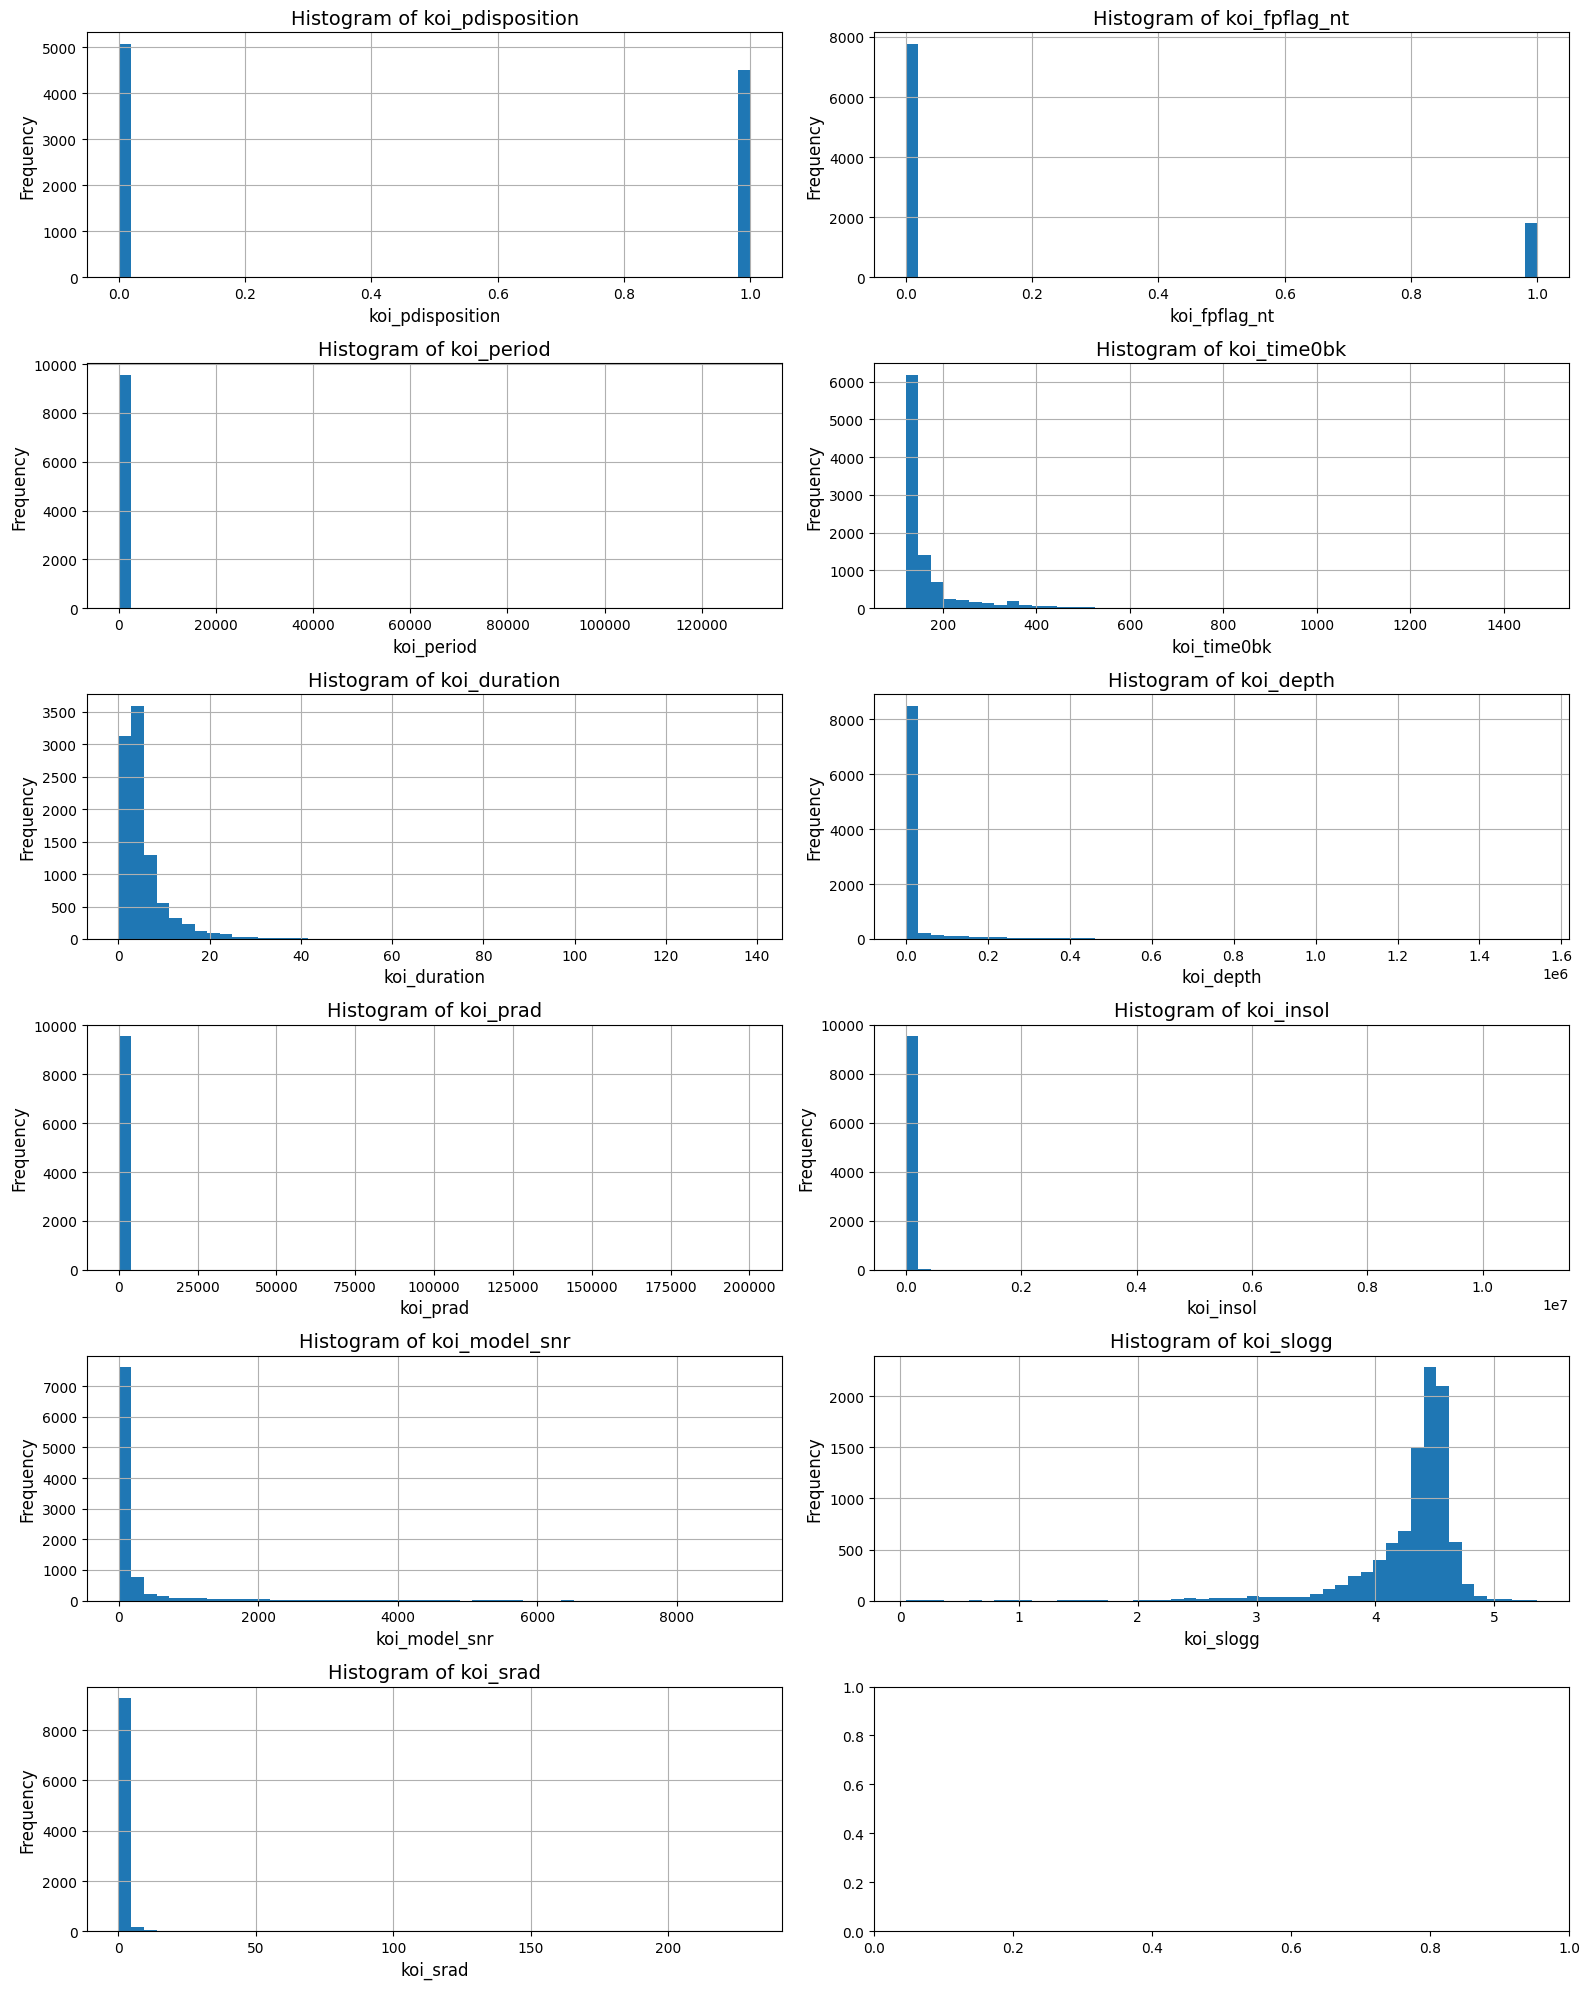

In [120]:
numeric_df = exoplanets.select_dtypes(include=['number'])

num_rows = (len(numeric_df.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))

if num_rows == 1:
    axes = [axes]
    
for i, column in enumerate(numeric_df.columns):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index][col_index]
    ax.hist(numeric_df[column], bins=50)  
    ax.set_title(f'Histogram of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True)


plt.tight_layout()
plt.show()

### 2. MinMax Scaling 

- Implementing minmax to aid with machine learning models to use (like KNNs, SVMs etc.)
- Checking that there are no negative values as we will encorporate minmax scaling

In [103]:
negative_rows = exoplanets[(exoplanets < 0).any(axis=1)]
negative_columns = exoplanets.columns[(exoplanets < 0).any()]

print("Rows containing negative values:")
print(negative_rows)

print("\nColumns containing negative values:")
print(negative_columns)

Rows containing negative values:
Empty DataFrame
Columns: [koi_pdisposition, koi_fpflag_nt, koi_period, koi_time0bk, koi_duration, koi_depth, koi_prad, koi_insol, koi_model_snr, koi_slogg, koi_srad]
Index: []

Columns containing negative values:
Index([], dtype='object')


In [129]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(exoplanets.values)
scaled_exoplanets = pd.DataFrame(scaled_values, columns=exoplanets.columns)

print(scaled_exoplanets)

      koi_pdisposition  koi_fpflag_nt  koi_period  koi_time0bk  koi_duration  \
0                  1.0            0.0    0.000071     0.036999      0.020980   
1                  1.0            0.0    0.000417     0.031063      0.032169   
2                  0.0            0.0    0.000151     0.040928      0.012494   
3                  0.0            0.0    0.000012     0.036828      0.017001   
4                  1.0            0.0    0.000018     0.037781      0.011571   
...                ...            ...         ...          ...           ...   
9559               0.0            0.0    0.000064     0.008506      0.034328   
9560               0.0            0.0    0.000002     0.008276      0.022891   
9561               1.0            0.0    0.000012     0.009235      0.022110   
9562               0.0            0.0    0.000003     0.008629      0.005871   
9563               0.0            0.0    0.000035     0.011448      0.021850   

      koi_depth  koi_prad     koi_insol

## IV. Column Renaming
Since the column names are hard to interpert the features being displayed, we will rename them to what they indicate

In [130]:
scaled_exoplanets = scaled_exoplanets.rename(columns={'koi_pdisposition':'Class',
                                                      'koi_fpflag_nt':'Not_Transit-like_False_Positive_Flag', 
                                                      'koi_period':'Orbit_Period', 
                                                      'koi_time0bk':'Transit_Epoch',
                                                      'koi_duration':'Transit_Duration', 
                                                      'koi_depth':'Transit_Depth', 
                                                      'koi_prad':'Planetary_Radius', 
                                                      'koi_insol':'Insolation_Flux', 
                                                      'koi_model_snr':'Transit_Signal-to-Noise',
                                                      'koi_slogg':'Stellar_Surface_Gravity', 
                                                      'koi_srad':'Stellar_Radius'})
scaled_exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Class                                 9564 non-null   float64
 1   Not_Transit-like_False_Positive_Flag  9564 non-null   float64
 2   Orbit_Period                          9564 non-null   float64
 3   Transit_Epoch                         9564 non-null   float64
 4   Transit_Duration                      9564 non-null   float64
 5   Transit_Depth                         9564 non-null   float64
 6   Planetary_Radius                      9564 non-null   float64
 7   Insolation_Flux                       9564 non-null   float64
 8   Transit_Signal-to-Noise               9564 non-null   float64
 9   Stellar_Surface_Gravity               9564 non-null   float64
 10  Stellar_Radius                        9564 non-null   float64
dtypes: float64(11)
me

In [131]:
scaled_exoplanets.Orbit_Period 

0       0.000071
1       0.000417
2       0.000151
3       0.000012
4       0.000018
          ...   
9559    0.000064
9560    0.000002
9561    0.000012
9562    0.000003
9563    0.000035
Name: Orbit_Period, Length: 9564, dtype: float64

In [133]:
scaled_exoplanets.to_csv('Cleaned_NasaExoplanetArchive.csv', index = False)